# Clustering Shopping Cart

Este es un template de como manejariamos un modelo de clustering 

Es importante setear antes de iniciar algunas variables de entorno

#### Linux / MAC

```{bash}
export BUCKET_MODEL=belc-bigdata-models-dlk-qas
export FOLDER_MODEL=template-model
export ENV_DEPLOY=QAS
export MLFLOW_HOST=internal-alb-datalake-casetwo-qas-45252694.us-east-1.elb.amazonaws.com
```


In [1]:
import os
import source.utils.mlflow as ml
from datetime import datetime
import source.utils.configvariables as uc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

# Configuracion MLFlow

Seteamos algunas variable principales para iniciar nuestro proyecto

In [3]:
ml_flow_host = uc.env_ml_flow_host
ml_flow_project = uc.env_ml_flow_project

In [4]:
Myflow = ml.MLFlowTracking(ml_flow_host)

In [5]:
run_name = 'Clustering'

## Iniciamos el experimento

Iniciamos el experimiento en la herramienta mlflow

In [6]:
active_run = Myflow.start_experiment(ml_flow_project, run_name=run_name)
active_run

<ActiveRun: >

In [7]:
dict_tags = {"Enviroment":uc.env_deploy,"Grupo":"Template","Proyecto":"Clustering"}
Myflow.model_logging_tags(dict_tags)

In [8]:
dict_params = {"pipeline":"validation","country":"CORP","campania-ini":"202201","campania-fin":"202205"}
Myflow.model_logging_params(dict_params)

## Preparación de Datos

In [9]:
file_name_data = "data_test/sample_cluster.csv.gz"

In [10]:
sample_data = pd.read_csv(file_name_data)
sample_data.head(5)

,m1_ppu,m2_ppu,m3_ppu,m1_pup,m2_pup,m3_pup,c1_ppu,c2_ppu,c3_ppu,c4_ppu,c5_ppu,c1_pup,c2_pup,c3_pup,c4_pup,c5_pup,code
0,0.145373,0.398150,0.456477,0.105263,0.526316,0.368421,0.117679,0.288705,0.142555,0.227009,0.224052,0.421053,0.315789,0.105263,0.105263,0.052632,-8604452458585199795
1,0.000000,0.459908,0.540092,0.000000,0.583333,0.416667,0.240132,0.462687,0.297181,0.000000,0.000000,0.500000,0.250000,0.250000,0.000000,0.000000,-6094991651184097439
2,0.000000,0.595409,0.404591,0.000000,0.166667,0.833333,0.226513,0.391292,0.149933,0.000000,0.232262,0.200000,0.200000,0.500000,0.000000,0.100000,-4329995829409842192
3,0.000000,0.606809,0.393191,0.000000,0.666667,0.333333,0.172716,0.360750,0.166211,0.300323,0.000000,0.285714,0.357143,0.285714,0.071429,0.000000,8481926713208375004
4,0.177547,0.488178,0.334276,0.190476,0.714286,0.095238,0.082448,0.441203,0.000000,0.219053,0.257296,0.619048,0.142857,0.000000,0.142857,0.095238,-8349215549152706958


In [11]:
def calculate_numbers_clusters():
    # TO DO:
    return 3

In [12]:
def define_colors_cluster():
    colors = ["#4EACC5", "#FF9C34", "#029A06"]
    color_dict = {}
    for idx in range(n_clusters):
        color_dict[idx] = colors[idx]
        
    return color_dict

In [13]:
n_clusters = calculate_numbers_clusters()
columns = ["m1_pup",'m2_pup','m3_pup']

### Trabajamos con el modelo

In [14]:
start_model = datetime.now()
current_time = start_model.strftime("%H:%M:%S")
print("Current Time is :", current_time)

# registramos el inicio del train
dict_params = {"train_time1_start":current_time}
Myflow.model_logging_params(dict_params)

Current Time is : 11:37:55


#### Training

In [15]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sample_data[columns])
sample_data['cluster'] = kmeans.labels_

In [16]:
end_model = datetime.now()
current_time = end_model.strftime("%H:%M:%S")

# registramos el fin del train
dict_params = {"train_time2_end":current_time}
Myflow.model_logging_params(dict_params)

dif_time = end_model-start_model
# registramos el diferencia del train
dict_params = {"train_time3_duration":dif_time}
Myflow.model_logging_params(dict_params)

### Validate las data

In [17]:
color_dict = define_colors_cluster()
sample_data['color'] = sample_data.cluster.map(color_dict)

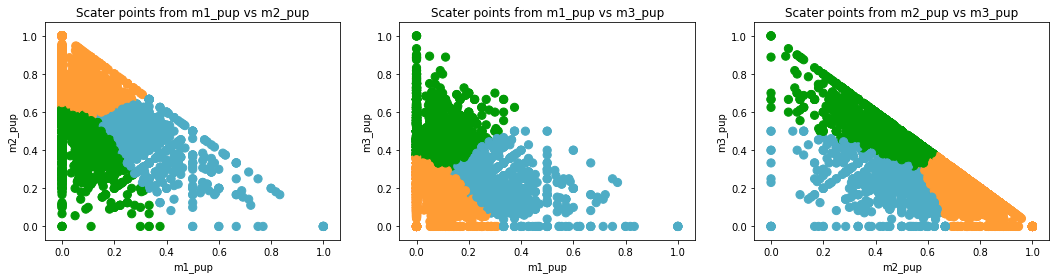

In [18]:
features = [("m1_pup", "m2_pup"),("m1_pup", "m3_pup"),("m2_pup", "m3_pup")]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for idx_ in range(len(features)):    
    axes[idx_].scatter(sample_data[features[idx_][0]], sample_data[features[idx_][1]], c=sample_data.color, s=67)
    axes[idx_].set_xlabel(features[idx_][0])
    axes[idx_].set_ylabel(features[idx_][1])
    axes[idx_].set_title(f"Scater points from {features[idx_][0]} vs {features[idx_][1]}")
plt.savefig("data_test/cluster.png")
plt.show()

/Users/chvasquez/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/chvasquez/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/chvasquez/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

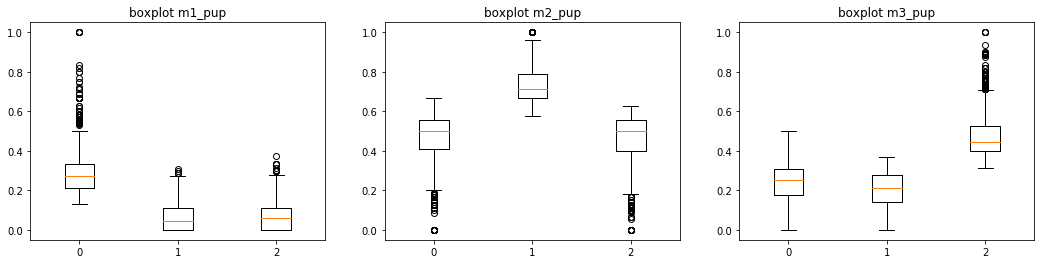

In [20]:
features = ["m1_pup", "m2_pup","m3_pup"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for idx_ in range(len(features)):
    data_box = [sample_data[sample_data["cluster"]==m_cluster][features[idx_]] for m_cluster in set(kmeans.labels_)]
    axes[idx_].boxplot(data_box, labels=list(set(kmeans.labels_)))
    axes[idx_].set_title('boxplot '+features[idx_])
plt.savefig("data_test/boxplot.png")
plt.show()


In [21]:
Myflow.model_logging_artifact("data_test/cluster.png", "results")
Myflow.model_logging_artifact("data_test/boxplot.png", "results")
Myflow.model_logging_artifact(file_name_data, "data")

# Para descargar información del experimiento hacia el local

In [23]:
Myflow.download_artifacts("results","images")

### Calculando metricas de distancias

In [24]:
dists = euclidean_distances(kmeans.cluster_centers_)
tri_dists = dists[np.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

In [25]:
# registramos validating data
dict_metrics = {"max_dist":max_dist, "avg_dist":avg_dist,"min_dist":min_dist}
Myflow.model_logging_metrics(dict_metrics)

## Terminando el experimento

In [26]:
Myflow.end_experiment()